# Loading modules

In [1]:
import xarray as xr
import numpy as np
import sys
from glob import glob
import gc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

sys.path.append('../../')
"""
local scripts, if loading from a different directory include that with a '.' between
directory name and script name
"""
from tropical_PODs.PODs.POD_utils import calculate_saturation_specific_humidity
from tropical_PODs.PODs.POD_utils import mass_weighted_vertical_integral_w_nan
from tropical_PODs.PODs.POD_utils import limit_files_to_select_years
from tropical_PODs.PODs.POD_utils import calculate_backward_forward_center_difference
from tropical_PODs.PODs.POD_utils import bin_by_one_variable
from tropical_PODs.PODs.POD_utils import bin_by_two_variables
from tropical_PODs.PODs.POD_utils import calculate_one_variable_binned_ivar_composites
from tropical_PODs.PODs.POD_utils import calculate_two_variable_binned_ivar_composites
from tropical_PODs.PODs.POD_utils import calculate_two_variable_binned_coevolution_composites
from tropical_PODs.PODs.POD_utils import process_multiyear_one_variable_binned_ivar_composites
from tropical_PODs.PODs.POD_utils import process_multiyear_two_variable_binned_ivar_composites
from tropical_PODs.PODs.POD_utils import process_multiyear_two_variable_binned_coevolution_composites
from tropical_PODs.PODs.POD_utils import plot_one_variable_binned_ivar_with_pdf
from tropical_PODs.PODs.POD_utils import plot_one_variable_binned_ivar_log_scale_with_pdf
from tropical_PODs.PODs.POD_utils import plot_two_variables_binned_composites
from tropical_PODs.PODs.POD_utils import plot_two_variable_binned_composites_log_y_scale

# Define input directories and file names

In [2]:
# Years to analyze
start_year = (2010)
end_year = (2011)

################
###.  ERA5.  ###
################

# Atmosphere

ifile_specific_humidity = '../../tropical_PODs/data/shum.2p5.*.nc' # ERA5 Specific Humidity
ifile_temperature = '../../tropical_PODs/data/air.2p5.*.nc' # ERA5 Temperature
ifile_surface_pressure = '../../tropical_PODs/data/pres.sfc.2p5.*.nc' # ERA5 Surface Pressure
ifile_precipitation = '../../tropical_PODs/data/3B-DAY.MS.MRG.3IMERG.V06.*' # IMERG Precipitation

# Land
ifile_land_frac = '../../tropical_PODs/data/land_sea_mask.erai.2p5.nc' # ERAi Land Fraction 


# Define output directories

In [3]:
# Output directory for datasets
odir_datasets = '../../tropical_PODs/examples/ofiles_examples/'

# Output directory for datasets
odir_plots = '../../tropical_PODs/examples/oplots_examples/'

# Driver for calculations

2010


/var/folders/1r/wpw0gwg52_j941w9vgbh7k2w0000gn/T/ipykernel_64409/2084992662.py:122: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  precipitation_rate['time'] = precipitation_rate.indexes['time'].to_datetimeindex() # IMERG time was saved as CFtime, and we need to convert to datetime for xarray


Modifying landfrac as needed
<xarray.DataArray 'landfrac' (lon: 144, lat: 73)>
array([[nan,  0.,  0., ...,  1.,  1., nan],
       [nan,  0.,  0., ...,  1.,  1., nan],
       [nan,  0.,  0., ...,  1.,  1., nan],
       ...,
       [nan,  0.,  0., ...,  1.,  1., nan],
       [nan,  0.,  0., ...,  1.,  1., nan],
       [nan,  0.,  0., ...,  1.,  1., nan]])
Dimensions without coordinates: lon, lat
Calculating true model pressure
Calculating saturation specific humidity
Column Integrating
<xarray.DataArray (time: 365, lat: 9, lon: 144)>
array([[[0.49059991, 0.47610055, 0.46080698, ..., 0.42523265,
         0.41020302, 0.44004592],
        [0.58733729, 0.57832078, 0.57055134, ..., 0.49052878,
         0.52619598, 0.56675239],
        [0.63382367, 0.64380492, 0.64747862, ..., 0.59121633,
         0.59681328, 0.61371667],
        ...,
        [0.57805538, 0.53096824, 0.56163491, ..., 0.70495146,
         0.72023205, 0.68232305],
        [0.55455345, 0.50589538, 0.45958966, ..., 0.61533036,
   

/var/folders/1r/wpw0gwg52_j941w9vgbh7k2w0000gn/T/ipykernel_64409/2084992662.py:122: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  precipitation_rate['time'] = precipitation_rate.indexes['time'].to_datetimeindex() # IMERG time was saved as CFtime, and we need to convert to datetime for xarray


Modifying landfrac as needed
<xarray.DataArray 'landfrac' (lon: 144, lat: 73)>
array([[nan,  0.,  0., ...,  1.,  1., nan],
       [nan,  0.,  0., ...,  1.,  1., nan],
       [nan,  0.,  0., ...,  1.,  1., nan],
       ...,
       [nan,  0.,  0., ...,  1.,  1., nan],
       [nan,  0.,  0., ...,  1.,  1., nan],
       [nan,  0.,  0., ...,  1.,  1., nan]])
Dimensions without coordinates: lon, lat
Calculating true model pressure
Calculating saturation specific humidity
Column Integrating
<xarray.DataArray (time: 365, lat: 9, lon: 144)>
array([[[0.55536773, 0.55868483, 0.57889403, ..., 0.57827401,
         0.57494973, 0.56478251],
        [0.60349402, 0.66008913, 0.72176882, ..., 0.53041832,
         0.55104829, 0.58403362],
        [0.73364381, 0.75968388, 0.80600837, ..., 0.62044854,
         0.66172007, 0.69650779],
        ...,
        [0.45976632, 0.38566921, 0.42703548, ..., 0.65814293,
         0.62730781, 0.63194519],
        [0.31568587, 0.27906112, 0.27723289, ..., 0.38861837,
   

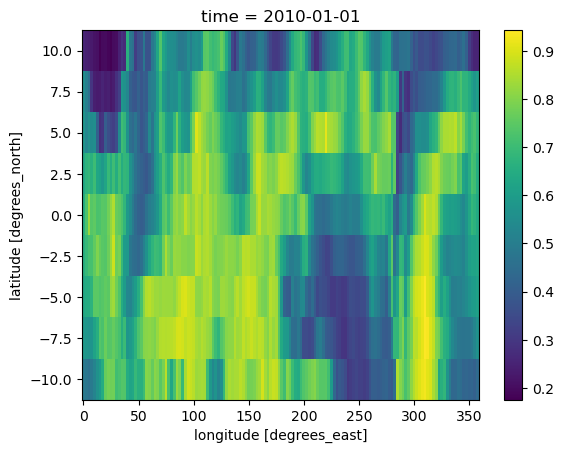

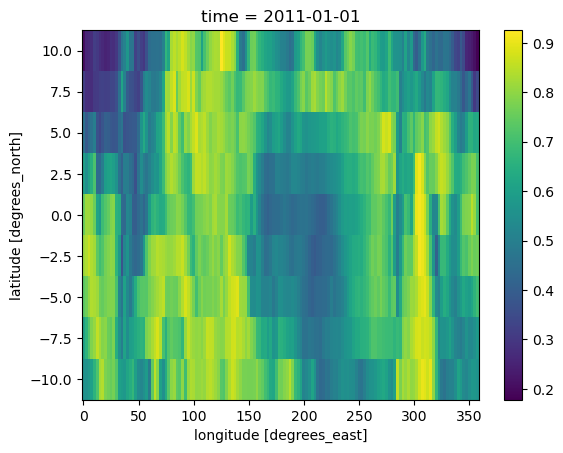

In [4]:
# Define constants
    
g = 9.8 # [m s^-2]

#########################################
# Define paths of files we wish to load #
#########################################
    
# glob expands paths with * to a list of files, like the unix shell #

paths_specific_humidity = glob(ifile_specific_humidity)
paths_temperature = glob(ifile_temperature)
paths_surface_pressure = glob(ifile_surface_pressure)
paths_precipitation = glob(ifile_precipitation)
paths_land = glob(ifile_land_frac)
        
for year in range(start_year, end_year + 1):
        
    print(year)
            
    # Define year strings #
        
    previous_year_string = str(year - 1)
    current_year_string = str(year)
    next_year_string = str(year + 1)
            
    while len(previous_year_string) < 4:
        previous_year_string = '0' + previous_year_string
                
    while len(current_year_string) < 4:
        current_year_string = '0' + current_year_string
                
    while len(next_year_string) < 4:
        next_year_string = '0' + next_year_string
            
    # Limit paths #
        
    year_limited_paths_specific_humidity = []
    year_limited_paths_temperature = []
    year_limited_paths_surface_pressure = []
    year_limited_paths_precipitation = []
            
    for string in paths_specific_humidity:
                        
        if (current_year_string in string):
                
            year_limited_paths_specific_humidity += [string]
            
    for string in paths_temperature:
                        
        if (current_year_string in string):
                
            year_limited_paths_temperature += [string]
            
    for string in paths_surface_pressure:
                        
        if (current_year_string in string):
                
            year_limited_paths_surface_pressure += [string]
                
    for string in paths_precipitation:
                        
        if (current_year_string in string):
                
            year_limited_paths_precipitation += [string]
    
    #####################
    ####  Load Data  ####
    #####################

    # Data is "lazy loaded", nothing is actually loaded until we "look" at data in some way #

    dataset_specific_humidity = xr.open_mfdataset(year_limited_paths_specific_humidity, combine="by_coords")
    dataset_temperature = xr.open_mfdataset(year_limited_paths_temperature, combine="by_coords")
    dataset_surface_pressure = xr.open_dataset(year_limited_paths_surface_pressure[0])
    dataset_precipitation = xr.open_mfdataset(year_limited_paths_precipitation, combine="by_coords")
    dataset_land = xr.open_dataset(paths_land[0])

    #####################
    ####  Load Data  ####
    #####################
              
    # Make data arrays, loading only the year of interest #
    full_lat = dataset_surface_pressure['lat']
    full_lon = dataset_surface_pressure['lon']
    land_sea_mask = dataset_land['land_sea_mask']

    PS = dataset_surface_pressure['pres'].sel(time = slice(previous_year_string+'-12-31', next_year_string+'-01-01'), lat = slice(10, -10)) # [Pa]
    Q = dataset_specific_humidity['shum'].sel(time = slice(previous_year_string+'-12-31', next_year_string+'-01-01'),lat = slice(10, -10), level = slice(70, 1000)) # [Kg/Kg]
    T = dataset_temperature['air'].sel(time = slice(previous_year_string+'-12-31', next_year_string+'-01-01'),lat = slice(10, -10), level = slice(70, 1000)) # [K]
    precipitation_rate = dataset_precipitation['precipAvg'].sel(time = slice(previous_year_string+'-12-31', next_year_string+'-01-01'), lat = slice(-10, 10)) * (24) # Currently [mm/hr]. Convert to [mm/day]

    # Actually load data #
    land_sea_mask.load()
    PS.load()
    Q.load()
    T.load()
    precipitation_rate.load()

    # Clean up environment #
    
    gc.collect();
 
    ################################
    ####  Average Data to Daily ####
    ################################
    
    ###   Test for Averaging Method   ###
            
    #PS.sel(time=slice('1998-01-01','1998-01-01'),lat=5,lon=75).plot()
    #print(PS.resample(time='1D').mean('time').sel(time=slice('1998-01-01','1998-01-01'),lat=5,lon=75))
    #print(PS.sel(time=slice('1998-01-01','1998-01-01'),lat=5,lon=75).mean('time'))
    #print(PS.resample(time='1D').mean('time').sel(time=slice('1998-01-01','1998-01-01'),lat=5,lon=75).values == PS.sel(time=slice('1998-01-01','1998-01-01'),lat=5,lon=75).mean('time').values)
    
    ###   Perform Averaging   ###
            
    PS = PS.resample(time='1D').mean('time')
    Q = Q.resample(time='1D').mean('time')
    T = T.resample(time='1D').mean('time')
    precipitation_rate = precipitation_rate.resample(time='1D').mean('time')

    precipitation_rate['time'] = precipitation_rate.indexes['time'].to_datetimeindex() # IMERG time was saved as CFtime, and we need to convert to datetime for xarray

    # ### Update time to reflect center of daily average   ###
    
    # PS = PS.assign_coords({'time':PS['time']+pd.to_timedelta(10.5, unit='H')})
    # Q = Q.assign_coords({'time':Q['time']+pd.to_timedelta(10.5, unit='H')})
    # T = T.assign_coords({'time':T['time']+pd.to_timedelta(10.5, unit='H')})


    ###############################################
    ####  Modify "landfrac" Variable as Needed ####
    ###############################################
    
    print("Modifying landfrac as needed")

    landfrac = land_sea_mask.rename({'Latitude':'lat','Longitude':'lon'})
    landfrac = landfrac.rename('landfrac')
    print(landfrac)
    
    # The landfrac variable does not have lat/lon coordinates. Assign those of variables and check to make sure they make sense #
    
    #print(landfrac.coords['lat'])
    landfrac.coords['lat'] = full_lat.coords['lat']
    landfrac.coords['lon'] = full_lon.coords['lon']

    landfrac = landfrac.transpose()

    landfrac = landfrac.sel(lat = slice(10, -10)) 
    
    # Clean up environment #
    
    gc.collect();
    
    #####################################
    ####  Modify variables as needed ####
    #####################################
    
    PS = PS.rename('PS')
    PS = PS.transpose('time','lat','lon')
    PS = PS.sortby('lat', ascending=True) # Re-order lat to match code for other datasets
    #print(PS)
    
    Q = Q.rename({'level':'lev'})
    Q = Q.rename('Q')
    Q = Q.transpose('time','lev','lat','lon')
    Q = Q.sortby('lat', ascending=True) # Re-order lat to match code for other datasets
    #print(Q)
    
    T = T.rename({'level':'lev'})
    T = T.rename('T')
    T = T.transpose('time','lev','lat','lon')
    T = T.sortby('lat', ascending=True) # Re-order lat to match code for other datasets
    #print(T)

    precipitation_rate = precipitation_rate.rename('precipitation_rate')
    precipitation_rate = precipitation_rate.transpose('time','lat','lon')
    precipitation_rate = precipitation_rate.sortby('lat', ascending=True) # Re-order lat to match code for other datasets
    
    landfrac = landfrac.sortby('lat', ascending=True) # Re-order lat to match code for other datasets
    
    # Clean up environment #
    
    gc.collect();

    #########################################
    ####  Calculate True Model Pressure  ####
    #########################################

    print("Calculating true model pressure")
    
    # Set upper most interface equal to uppermost level midpoint, and lowest interface equal to surface pressure.
    # This will still permit the desired vertical integral, just choose appropriate upper and lower integration limits
    
    # Model level midpoint

    true_pressure_midpoint = Q['lev'] * 100. # To convert to Pa
    true_pressure_midpoint = true_pressure_midpoint.rename('true_pressure_midpoint_Pa')
    true_pressure_midpoint = true_pressure_midpoint.expand_dims({'lat':Q['lat'], 'lon':Q['lon'], 'time':Q['time']})
    true_pressure_midpoint = true_pressure_midpoint.transpose('time','lev','lat','lon')
    
    # Model level interfaces
    
    true_pressure_interface = np.empty((len(Q.time),len(Q.lat),len(Q.lon),len(Q.lev)+1))

    for interface_level_counter in range(len(Q.lev) + 1):
        if interface_level_counter == 0:
            true_pressure_interface[:,:,:,interface_level_counter] = Q['lev'].isel(lev=0).values # Set upper most interface equal to uppermost level midpoint
        elif interface_level_counter == (len(Q.lev)):
            true_pressure_interface[:,:,:,interface_level_counter] = PS # Set lowest interface equal to surface pressure
        else:
            true_pressure_interface[:,:,:,interface_level_counter] = (Q['lev'].isel(lev=interface_level_counter-1).values + Q['lev'].isel(lev=interface_level_counter).values) / 2.,  # Set middle interfaces equal to half way points between level midpoints
            
    coords = {'time':Q['time'], 'lat':Q['lat'], 'lon':Q['lon'], 'ilev':np.arange(1,len(Q.lev) + 2)}
    dims = ['time', 'lat', 'lon', 'ilev']
    true_pressure_interface = xr.DataArray(true_pressure_interface,dims=dims,coords=coords) * 100. # To convert to Pa
    true_pressure_interface.attrs['units'] = 'Pa'      
    
    true_pressure_interface = true_pressure_interface.transpose('time','ilev','lat','lon')

    # Clean up environment #
    
    gc.collect();
  
    ########################
    ###  Calculate CSF  ####
    ########################
    
    ####  Calculate Saturation Specific Humidity  ####

    print("Calculating saturation specific humidity")

    saturation_specific_humidity = xr.apply_ufunc(calculate_saturation_specific_humidity, true_pressure_midpoint, T,
                                            output_dtypes=[Q.dtype])
    
    # Clean up environment #
    
    gc.collect();

    ####  Column Integrate Variables  ####
        
    upper_level_integration_limit_Pa = 10000 # [Pa]
        
    lower_level_integration_limit_Pa = 100000 # [Pa]

    print('Column Integrating')
        
    ci_q, _, _ = mass_weighted_vertical_integral_w_nan(Q, true_pressure_midpoint, true_pressure_interface, lower_level_integration_limit_Pa, upper_level_integration_limit_Pa)
    #print(ci_q)
    #print(ci_q.min())
    #print(ci_q.max())
    #print(ci_q.mean())
    #plt.figure()
    #ci_q.isel(time = 0).plot()
        
    ci_q_sat, _, _ = mass_weighted_vertical_integral_w_nan(saturation_specific_humidity, true_pressure_midpoint, true_pressure_interface, lower_level_integration_limit_Pa, upper_level_integration_limit_Pa)
    #print(ci_q_sat)
    #print(ci_q_sat.min())
    #print(ci_q_sat.max())
    #print(ci_q_sat.mean())
    #plt.figure()
    #ci_q_sat.isel(time = 0).plot()
        
    csf = ci_q / ci_q_sat
    print(csf)
    print(csf.min())
    print(csf.max())
    plt.figure()
    csf.isel(time = 0).plot()
    
    # Name variables #

    csf.name = 'csf'
    csf.attrs['Units'] = '[Kg Kg^-1]'

    # Clean up environment #

    del Q, T, true_pressure_midpoint, true_pressure_interface, saturation_specific_humidity, ci_q, ci_q_sat
        
    gc.collect();
   
    #################################
    ####  Output Data as NetCDF  ####
    #################################

    # Output dataset to NetCDF #

    csf.sel(time = slice(current_year_string+'-01-01', current_year_string+'-12-31')).to_netcdf(odir_datasets + 'initial_test_CSF_' + current_year_string + '.nc')

    ###############################################
    ####  Limit to Oceanic (<10% Land) Points  ####
    ###############################################
        
    print('Applying Land/Ocean Mask')
        
    # Create ocean mask #

    is_valid_ocean_mask = (landfrac < 0.1)

    #is_valid_ocean_mask.plot()

    # Apply ocean mask to appropriate variables, setting invalid locations to nan #
        
    precipitation_rate = precipitation_rate.where(is_valid_ocean_mask, other = np.nan)

    csf = csf.where(is_valid_ocean_mask, other = np.nan)

    # ####################################################
    # ####  Calculate CSF Single Variable Composites  ####
    # ####################################################
        
    # print('Starting CSF Single Variable Composites')
        
    # ### Define binning parameters ###

    # ivar = precipitation_rate

    # ivar_name_str = 'precipitation_rate'

    # ivar_units_str = '[mm day^-1]'
        
    # BV1 = csf
        
    # BV1_name_str = 'csf'
        
    # BV1_units_str = '[Kg Kg^-1]'
        
    # lower_BV1_bin_limit_vector = np.arange(0.0, 0.99 + 0.01, 0.01) # CSF

    # upper_BV1_bin_limit_vector = np.arange(0.01, 1 + 0.01, 0.01) # CSF
        
    # log_bins_boolean = False

    # fname_datasets = odir_datasets
        
    # ##   Precipitation Terms   ###
        
    # calculate_one_variable_binned_ivar_composites(ivar, BV1, lower_BV1_bin_limit_vector, upper_BV1_bin_limit_vector, ivar_name_str, ivar_units_str, BV1_name_str, BV1_units_str, year, fname_datasets, log_bins_boolean)

    # ##########################################################
    # ###  Calculate CSF + Linear Precipitation Composites  ####
    # ##########################################################
        
    # print('Starting CSF + Precipitation Composites')
        
    # ### Define binning parameters ###

    # ivar = precipitation_rate

    # ivar_name_str = 'precipitation_rate'

    # ivar_units_str = '[mm day^-1]'
        
    # BV1 = csf
        
    # BV1_name_str = 'csf'
        
    # BV1_units_str = '[Kg Kg^-1]'
        
    # lower_BV1_bin_limit_vector = np.arange(0.0, 0.95 + 0.05, 0.05) # CSF

    # upper_BV1_bin_limit_vector = np.arange(0.05, 1 + 0.05, 0.05) # CSF
        
    # BV2 = precipitation_rate
        
    # BV2_name_str = 'precipitation_rate'
        
    # BV2_units_str = '[mm day^-1]'

    # lower_BV2_bin_limit_vector = np.concatenate([np.arange(0., 5. + 5., 5.), np.arange(10., 90. + 10., 10.)]) # Precipitation rate

    # upper_BV2_bin_limit_vector = np.concatenate([np.arange(5., 10. + 5., 5.), np.arange(20., 100. + 10., 10.)]) # Precipitation rate
        
    # log_bins_boolean = False

    # fname_datasets = odir_datasets
        
    # ###   Precipitation Terms   ###

    # calculate_two_variable_binned_coevolution_composites(BV1, BV2, lower_BV1_bin_limit_vector, upper_BV1_bin_limit_vector, lower_BV2_bin_limit_vector, upper_BV2_bin_limit_vector, BV1_name_str, BV1_units_str, BV2_name_str, BV2_units_str, year, fname_datasets, log_bins_boolean)

    # calculate_two_variable_binned_ivar_composites(ivar, BV1, BV2, lower_BV1_bin_limit_vector, upper_BV1_bin_limit_vector, lower_BV2_bin_limit_vector, upper_BV2_bin_limit_vector, ivar_name_str, ivar_units_str, BV1_name_str, BV1_units_str, BV2_name_str, BV2_units_str, year, fname_datasets, log_bins_boolean)

    #######################################################
    ###  Calculate CSF + Log Precipitation Composites  ####
    #######################################################
        
    print('Starting CSF + Log Precipitation Composites')
        
    ### Define binning parameters ###

    log_space = np.logspace(-4,3,num=29)

    ivar = precipitation_rate

    ivar_name_str = 'precipitation_rate'

    ivar_units_str = '[mm day^-1]'
        
    BV1 = csf
        
    BV1_name_str = 'csf'
        
    BV1_units_str = '[Kg Kg^-1]'
        
    lower_BV1_bin_limit_vector = np.arange(0.0, 0.95 + 0.05, 0.05) # CSF

    upper_BV1_bin_limit_vector = np.arange(0.05, 1 + 0.05, 0.05) # CSF
        
    BV2 = precipitation_rate
        
    BV2_name_str = 'precipitation_rate'
        
    BV2_units_str = '[mm day^-1]'

    lower_BV2_bin_limit_vector = log_space[0 : -1] # Precipitation rate

    upper_BV2_bin_limit_vector = log_space[1 :] # Precipitation rate
        
    log_bins_boolean = True

    fname_datasets = odir_datasets
        
    ###   Precipitation Terms   ###

    calculate_two_variable_binned_coevolution_composites(BV1, BV2, lower_BV1_bin_limit_vector, upper_BV1_bin_limit_vector, lower_BV2_bin_limit_vector, upper_BV2_bin_limit_vector, BV1_name_str, BV1_units_str, BV2_name_str, BV2_units_str, year, fname_datasets, log_bins_boolean)

    calculate_two_variable_binned_ivar_composites(ivar, BV1, BV2, lower_BV1_bin_limit_vector, upper_BV1_bin_limit_vector, lower_BV2_bin_limit_vector, upper_BV2_bin_limit_vector, ivar_name_str, ivar_units_str, BV1_name_str, BV1_units_str, BV2_name_str, BV2_units_str, year, fname_datasets, log_bins_boolean)

# Driver for plotting

In [6]:
# Define colormap # 

colors = [(10, 50, 120), (15, 75, 165), (30, 110, 200), (60, 160, 240), (80, 180, 250), (130, 210, 255), (160, 240, 255), (200, 250, 255), (230, 255, 255), (230, 230, 230), (230, 230, 230), (255, 250, 220), (255, 232, 120), (255, 192, 60), (255, 160, 0), (255, 96, 0), (255, 50, 0), (225, 20, 0), (192, 0, 0), (165, 0, 0)]
for list_index in range(len(colors)):
    colors[list_index] = tuple(tuple_element/255. for tuple_element in colors[list_index])
        
n_bin = 200
cmap_name = 'colors'
colormap_colors = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bin)

### Define plotting parameters ###

min_number_of_obs = 200

years_to_plot_list = list(range(2010,2012))

## Load and plot CSF binned data

In [5]:

###   Precipitation Rate   ###

precipitation_rate_composite = process_multiyear_one_variable_binned_ivar_composites(limit_files_to_select_years(glob(odir_datasets + 'csf_binned_precipitation_rate_composite_*'), years_to_plot_list))



#### CSF Binned Precipitation Rate with PDF

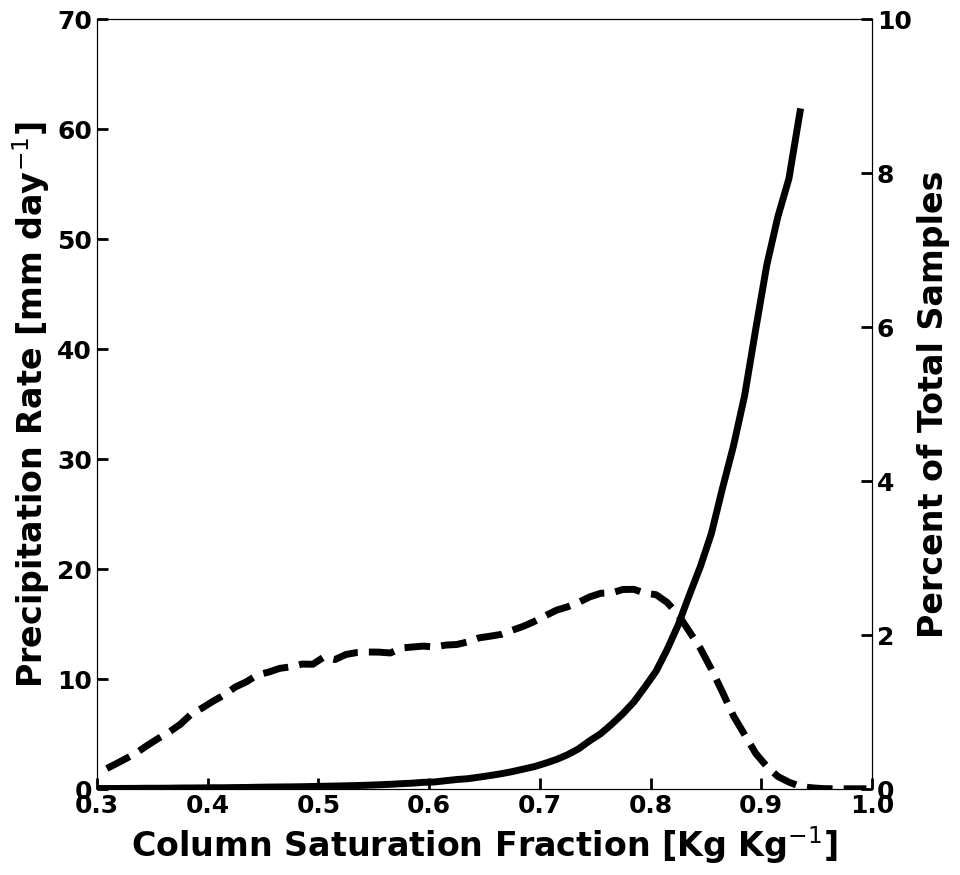

In [7]:
save_fig_boolean = False
figure_path_and_name = odir_plots + 'CSF_binned_precipitation_rate_' + str(years_to_plot_list[0]) + '_' + str(years_to_plot_list[-1]) + '.png'

plot_one_variable_binned_ivar_with_pdf(precipitation_rate_composite, min_number_of_obs, save_fig_boolean, figure_path_and_name)

#### CSF Binned Precipitation Rate with PDF on Log Scale

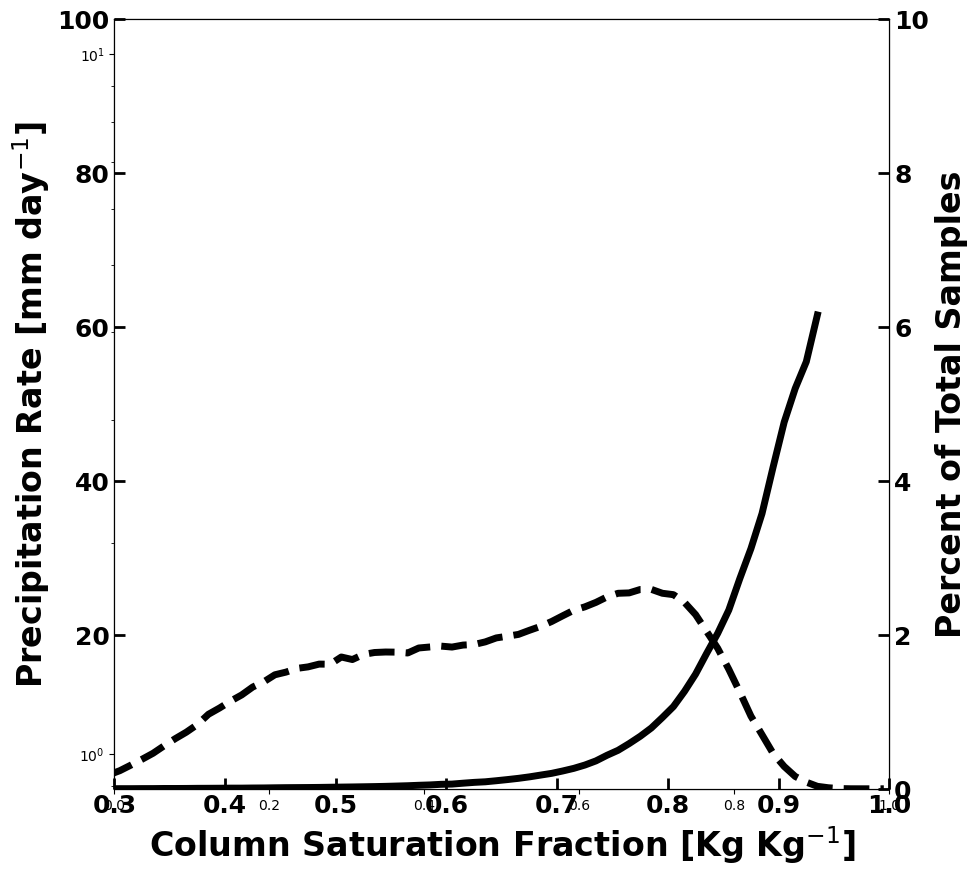

In [8]:
save_fig_boolean = False
figure_path_and_name = odir_plots + 'CSF_binned_log_precipitation_rate_' + str(years_to_plot_list[0]) + '_' + str(years_to_plot_list[-1]) + '.png'

plot_one_variable_binned_ivar_log_scale_with_pdf(precipitation_rate_composite, min_number_of_obs, save_fig_boolean, figure_path_and_name)

## Load and plot CSF-precipitation binned data

In [7]:
csf_precipitation_rate_binned_coevolution_composite = process_multiyear_two_variable_binned_coevolution_composites(limit_files_to_select_years(glob(odir_datasets + 'csf_precipitation_rate_binned_coevolution_composite_*'), years_to_plot_list))
csf_precipitation_rate_binned_precipitation_rate_composite = process_multiyear_two_variable_binned_ivar_composites(limit_files_to_select_years(glob(odir_datasets + 'csf_precipitation_rate_binned_precipitation_rate_composite_*'), years_to_plot_list))

#### Probability of increasing precipitation rate

/Users/bwolding_personal/anaconda3/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


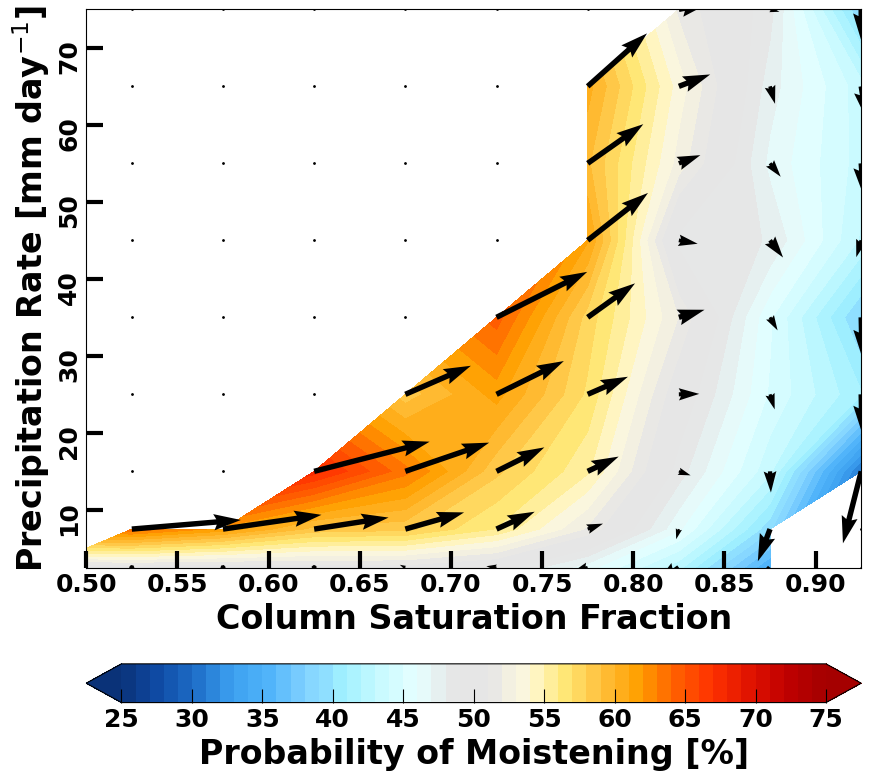

In [8]:
two_variable_binned_coevolution_composites = csf_precipitation_rate_binned_coevolution_composite
color_shading_var = (csf_precipitation_rate_binned_precipitation_rate_composite['bin_number_pos_delta_ivar_centered'] / csf_precipitation_rate_binned_precipitation_rate_composite['bin_number_of_samples_centered'])*100
color_shading_var_number_of_samples = csf_precipitation_rate_binned_precipitation_rate_composite['bin_number_of_samples_centered']
color_shading_levels = np.arange(25, 76, 1)
color_shading_map = colormap_colors
colorbar_extend_string = 'both'
colorbar_tick_levels = np.arange(25, 80, 5)
colorbar_label_string = 'Probability of Moistening [%]'
scientific_colorbar_boolean = False
plot_vectors_boolean = True
leading_lagging_centered_string='centered'
save_fig_boolean = False
figure_path_and_name = odir_plots + 'csf_precipitation_rate_binned_precipitation_rate_composite_' + str(years_to_plot_list[0]) + '_' + str(years_to_plot_list[-1]) + '.png'

plot_two_variables_binned_composites(two_variable_binned_coevolution_composites, color_shading_var, color_shading_var_number_of_samples, min_number_of_obs, color_shading_levels, color_shading_map, colorbar_extend_string, colorbar_tick_levels, colorbar_label_string, scientific_colorbar_boolean, plot_vectors_boolean, leading_lagging_centered_string, save_fig_boolean, figure_path_and_name)


## Load and plot CSF-precipitation binned data

In [8]:
csf_precipitation_rate_log_binned_coevolution_composite = process_multiyear_two_variable_binned_coevolution_composites(limit_files_to_select_years(glob(odir_datasets + 'csf_precipitation_rate_log_binned_coevolution_composite_*'), years_to_plot_list))
csf_precipitation_rate_log_binned_precipitation_rate_composite = process_multiyear_two_variable_binned_ivar_composites(limit_files_to_select_years(glob(odir_datasets + 'csf_precipitation_rate_log_binned_precipitation_rate_composite_*'), years_to_plot_list))

#### Probability of increasing precipitation rate

/Users/bwolding_personal/anaconda3/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


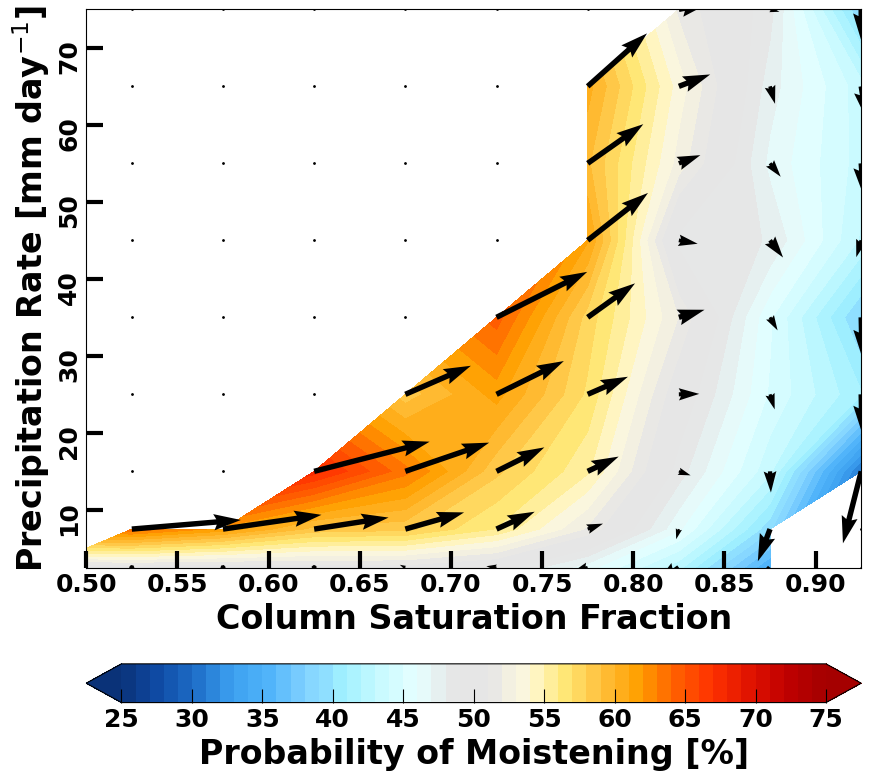

In [ ]:
two_variable_binned_coevolution_composites = csf_precipitation_rate_log_binned_coevolution_composite
color_shading_var = (csf_precipitation_rate_log_binned_precipitation_rate_composite['bin_number_pos_delta_ivar_centered'] / csf_precipitation_rate_log_binned_precipitation_rate_composite['bin_number_of_samples_centered'])*100
color_shading_var_number_of_samples = csf_precipitation_rate_log_binned_precipitation_rate_composite['bin_number_of_samples_centered']
color_shading_levels = np.arange(25, 76, 1)
color_shading_map = colormap_colors
colorbar_extend_string = 'both'
colorbar_tick_levels = np.arange(25, 80, 5)
colorbar_label_string = 'Probability of Moistening [%]'
scientific_colorbar_boolean = False
plot_vectors_boolean = True
leading_lagging_centered_string='centered'
save_fig_boolean = False
figure_path_and_name = odir_plots + 'csf_precipitation_rate_log_binned_precipitation_rate_composite_' + str(years_to_plot_list[0]) + '_' + str(years_to_plot_list[-1]) + '.png'

plot_two_variables_binned_composites(two_variable_binned_coevolution_composites, color_shading_var, color_shading_var_number_of_samples, min_number_of_obs, color_shading_levels, color_shading_map, colorbar_extend_string, colorbar_tick_levels, colorbar_label_string, scientific_colorbar_boolean, plot_vectors_boolean, leading_lagging_centered_string, save_fig_boolean, figure_path_and_name)
